In [1]:
# Import libraries
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
from PIL import Image
from diffraction_class import *

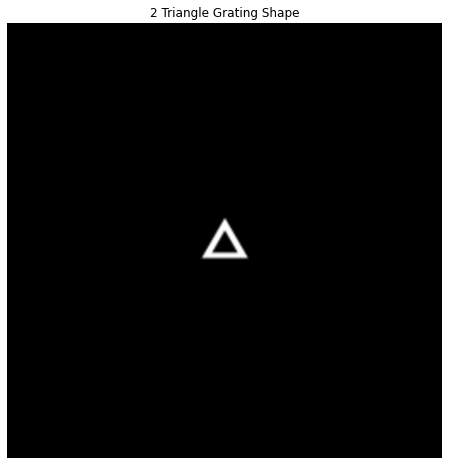

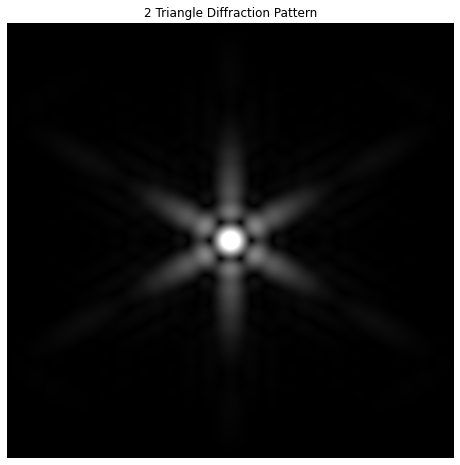

In [11]:
# 2 Triangle
tr2_image = Image.open("tr2.jpg")
tr2_array = np.array(tr2_image).transpose()[0]
tr2_raw, tr2_canvas = np.zeros((4096, 4096)), np.zeros((4096, 4096))
tr2_raw[2048 - 64: 2048 + 64, 2048 - 63: 2048 + 63] = tr2_array
for i in np.arange(4096):
    for j in np.arange(4096):
        tr2_canvas[i][j] = tr2_raw[j][-i]

tr2 = Diffraction(tr2_canvas)
graph(tr2, 256, 1024, "2 Triangle", 0.005)